In [1]:
import numpy as np
import matplotlib.pyplot as plt
import athena_read as ar
import Constants 
from athena_read import athdf
from mpl_toolkits.axes_grid1 import ImageGrid

c=Constants.Constants()
%matplotlib inline

Constants defined...


In [2]:
def add_trapezoid(ax, r_min, r_max, theta_min, theta_max, N_arc=100):
    """Add a annulus sector."""

    # Circular arcs
    theta_arc = np.linspace(theta_min, theta_max, N_arc)
    r_outer = np.full_like(theta_arc, r_max)
    r_inner = np.full_like(theta_arc, r_min)

    # Convert to Cartesian coordinates
    y_outer = r_outer * np.cos(theta_arc)
    x_outer = r_outer * np.sin(theta_arc)
    y_inner = r_inner * np.cos(theta_arc[::-1])  # reverse to close polygon
    x_inner = r_inner * np.sin(theta_arc[::-1])

    # Connect radial edges to close the trapezoid
    x_trap = np.concatenate([x_outer, 
                            r_max*np.sin([theta_max]), r_min*np.sin([theta_max]), 
                            x_inner, 
                            r_min*np.sin([theta_min]), r_max*np.sin([theta_min])])
    y_trap = np.concatenate([y_outer, 
                            r_max*np.cos([theta_max]), r_min*np.cos([theta_max]), 
                            y_inner, 
                            r_min*np.cos([theta_min]), r_max*np.cos([theta_min])])
    ax.plot(x_trap, y_trap, 'k-', lw=1)

In [3]:
base_dir = '../../../data/planetary_engulfment_testinsp/'
myfile=base_dir + "PEGM.out1."+"00000"+".athdf"
d = athdf(myfile)
d_raw = athdf(myfile,raw=True)

In [4]:
R, Theta = np.meshgrid(d['x1f']/100/c.rsun, d['x2f'], indexing='ij')
Y = R * np.cos(Theta)
X = R * np.sin(Theta)

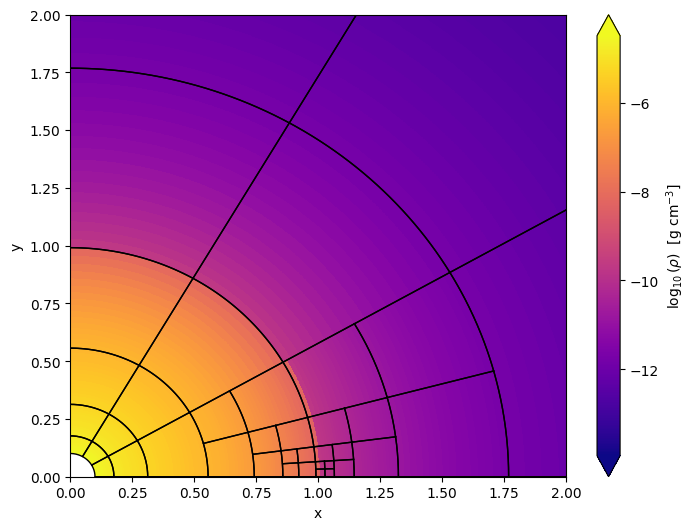

In [5]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
contour = ax.pcolormesh(X, Y, np.log10((d['rho'])[0,:,:]).T,cmap='plasma',shading='auto')
cb1=plt.colorbar(contour,extend='both',label=r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(0,2)
ax.set_ylim(0,2)

for block_id in range(d_raw['NumMeshBlocks']):
    if (np.min(d_raw['x3f'][block_id])<=0 and np.max(d_raw['x3f'][block_id])>0):
        r_min=np.min(d_raw['x1f'][block_id]/100/c.rsun)
        r_max=np.max(d_raw['x1f'][block_id]/100/c.rsun)
        theta_min=np.min(d_raw['x2f'][block_id])
        theta_max=np.max(d_raw['x2f'][block_id])
        add_trapezoid(ax, r_min, r_max, theta_min, theta_max)

In [37]:
for block_id in range(d_raw['NumMeshBlocks']):
    if (np.min(d_raw['x1f'][block_id]/100/c.rsun)<1 and np.max(d_raw['x1f'][block_id]/100/c.rsun)>1):
        r_max=np.max(d_raw['x1f'][block_id]/100/c.rsun)
print(r_max)

1.3630455
